### https://tianchi.aliyun.com/competition/information.htm?spm=5176.100067.5678.2.f9ac455879N4xR&raceId=231647

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency #方差检验
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

In [2]:
os.listdir("../数据")

['ads_0.pickle',
 'round1_ijcai_18_result_demo_20180301.txt',
 'round1_ijcai_18_test_a_20180301.txt',
 'round1_ijcai_18_test_a_20180301.zip',
 'round1_ijcai_18_train_20180301.txt',
 'round1_ijcai_18_train_20180301.zip',
 'train_0.pickle',
 'user_0.pickle']

In [3]:
%%time
train = pd.read_csv("../数据/round1_ijcai_18_train_20180301.txt",delimiter=" ")
train = train.drop_duplicates()

CPU times: user 11.7 s, sys: 676 ms, total: 12.4 s
Wall time: 19.1 s


In [4]:
%%time
demo = pd.read_csv("../数据/round1_ijcai_18_result_demo_20180301.txt",delimiter=" ")

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 12.8 ms


In [3]:
test = pd.read_csv("../数据/round1_ijcai_18_test_a_20180301.txt",delimiter=" ")
test.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_timestamp,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description
0,2475218615076601065,2275895163219263378,7908382889764677758;8277336076276184272,2636395404473730413;7515802706813700848;302719...,7838285046767229711,7534238860363577544,7,6,8,14,...,1537885700,4005,8277336076276184272:-1;5799347067982556520:-1;...,5275548996133547595,13,0.985244,5011,0.964023,0.966550,0.955378
1,398316874173557226,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537862843,4001,"5755694407684602296:216555019471416386,2636395...",329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134
2,6586402638209028583,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537858222,4011,5755694407684602296:2636395404473730413;871073...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134
3,1040996105851528465,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537860915,4001,8710739180200009128:-1;5755694407684602296:263...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134
4,6316278569655873454,7096238490711246967,7908382889764677758;5755694407684602296,5131280576272319091;2636395404473730413;734498...,8126195666233054089,3948283326616421003,6,9,8,16,...,1537859074,4001,5755694407684602296:5131280576272319091;871073...,329470548383752413,14,0.989068,5012,0.963794,0.964225,0.959134


In [14]:
tr_item_id = train[["item_id"]].drop_duplicates()
ts_item_id = test[["item_id"]].drop_duplicates()
ts_item_id.columns=["ts_item_id"]
a = pd.merge(tr_item_id,ts_item_id,how="left",left_on="item_id",right_on="ts_item_id")

In [19]:
a[a["ts_item_id"].notnull()].shape[0]

3534

In [20]:
ts_item_id.shape[0]

3695

In [ ]:
set(train["item_id"].to_list()) & set(test)

In [6]:
demo.head()

,instance_id,predicted_score
0,2475218615076601065,0.9
1,398316874173557226,0.7
2,6586402638209028583,0.5
3,1040996105851528465,0.3
4,6316278569655873454,0.1


In [7]:
%%time
test = pd.read_csv("../数据/round1_ijcai_18_test_a_20180301.txt",delimiter=" ")

CPU times: user 408 ms, sys: 72 ms, total: 480 ms
Wall time: 1.21 s


In [8]:
test.shape

(18371, 26)

## 1.读取数据
-----
> * 统计每个特征的取值个数
> * 空值个数
> * 正负样本比例
> * 数据类型

In [9]:
train.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


In [ ]:
train

In [15]:
train.shape

(478111, 27)

### 1.1 统计每个特征对应的取值个数

In [10]:
train.shape

(478111, 27)

In [11]:
#统计每个特征的取值个数
nunique_cnt = train.nunique()
nunique_cnt

instance_id                  478087
item_id                       10075
item_category_list               14
item_property_list            10908
item_brand_id                  2055
item_city_id                    128
item_price_level                 14
item_sales_level                 18
item_collected_level             18
item_pv_level                    22
user_id                      197694
user_gender_id                    4
user_age_level                    9
user_occupation_id                5
user_star_level                  12
context_id                   478111
context_timestamp            281824
context_page_id                  20
predict_category_property     78796
shop_id                        3959
shop_review_num_level            25
shop_review_positive_rate     11825
shop_star_level                  22
shop_score_service            16361
shop_score_delivery           16423
shop_score_description        16463
is_trade                          2
dtype: int64

#####  问题所在
----
> * 原始数据一共478138行，而样本编码（instance_id)为478087，为什么？
> * 检查测试集看instance_id是否为空

In [12]:
test["instance_id"].value_counts()

7055671380612717600    1
3195686240835722971    1
1818164457986282905    1
557324981652623607     1
7816020961506650153    1
4932547166397956445    1
2841706222821841608    1
1495054868885107395    1
1428935501295831614    1
4020771236918776293    1
8577449422879856484    1
9002692419393703299    1
5186773674513142916    1
7404482430937478083    1
8190211489375551485    1
7194776423308597621    1
3194398481957330634    1
1444100388981773856    1
4672983701832677886    1
8288980414382476586    1
1571659358536386870    1
8837918254421401904    1
9157669017407355747    1
3910768229151601062    1
6876130707136505063    1
5232681213365807371    1
6937144296054426237    1
1123472121030692105    1
4022539315629669884    1
7970923563676126906    1
                      ..
981816372945031993     1
2931317077523774927    1
6729832655393478526    1
8488555215587182092    1
9122244226732800315    1
252896656277381417     1
104553508642102302     1
2059431310940235167    1
3706241587879710456    1


In [13]:
train["instance_id"].value_counts()

2535273059737073357    2
6344363116315363445    2
1037061371711078396    2
2264716673495444735    2
6592583059060882788    2
348545486282294646     2
2910529267144588090    2
191012710137081307     2
644690756602987584     2
4110443799016068208    2
7773970221732336968    2
4598693726484786606    2
8042010293411636231    2
6214707899917303043    2
8495813758894672234    2
4716737653711059052    2
6484429841255256717    2
6020113693432894079    2
6458098125008270690    2
251764820957840061     2
4505908068775890459    2
2820033257616039272    2
6031880284089240838    2
7613854672358296887    2
7976791347830683894    1
5291051777058952190    1
4786333317945974262    1
7624289353549415715    1
1254516543081130071    1
1277204676569062031    1
                      ..
4757241322529199156    1
2308215517964350519    1
4500579299644989471    1
9037510016191738257    1
722076614882461939     1
7640697350130511938    1
5656254692145407091    1
2030658619486086662    1
3970710612273785990    1


In [14]:
insID_cnt = train["instance_id"].value_counts()
train[train["instance_id"].isin(insID_cnt[insID_cnt>1].index)].nunique()

instance_id                  24
item_id                      48
item_category_list            8
item_property_list           48
item_brand_id                34
item_city_id                 14
item_price_level              5
item_sales_level             13
item_collected_level         14
item_pv_level                10
user_id                      48
user_gender_id                3
user_age_level                8
user_occupation_id            2
user_star_level              10
context_id                   48
context_timestamp            48
context_page_id              11
predict_category_property    47
shop_id                      47
shop_review_num_level        11
shop_review_positive_rate    26
shop_star_level              10
shop_score_service           48
shop_score_delivery          48
shop_score_description       48
is_trade                      1
dtype: int64

In [15]:
duplicateItem = train[train["instance_id"].isin(insID_cnt[insID_cnt>1].index)]["item_id"].unique()
non_duplicateItem = train[train["instance_id"].isin(insID_cnt[insID_cnt==1].index)]["item_id"].unique()

In [16]:
len(list(set(duplicateItem)&set(non_duplicateItem)))

47

In [17]:
train[train["instance_id"].isin(insID_cnt[insID_cnt==1].index)].nunique()

instance_id                  478063
item_id                       10074
item_category_list               14
item_property_list            10907
item_brand_id                  2055
item_city_id                    128
item_price_level                 14
item_sales_level                 18
item_collected_level             18
item_pv_level                    22
user_id                      197681
user_gender_id                    4
user_age_level                    9
user_occupation_id                5
user_star_level                  12
context_id                   478063
context_timestamp            281810
context_page_id                  20
predict_category_property     78793
shop_id                        3958
shop_review_num_level            25
shop_review_positive_rate     11824
shop_star_level                  22
shop_score_service            16361
shop_score_delivery           16422
shop_score_description        16462
is_trade                          2
dtype: int64

##### 结论
----
> * 在训练集中instance_id重复的有48个，而测试集里没有instance_id重复的，故猜测训练集instance_id发生了小小的错误。鉴于分析的方便，建议把训练集instance_id重复的记录删除

In [18]:
train = train[train["instance_id"].isin(insID_cnt[insID_cnt==1].index)]
train.shape

(478063, 27)

In [19]:
train = train.to_pickle("../数据/train_0.pickle")

In [25]:
nunique_cnt = train.nunique()
nunique_cnt

instance_id                  478063
item_id                       10074
item_category_list               14
item_property_list            10907
item_brand_id                  2055
item_city_id                    128
item_price_level                 14
item_sales_level                 18
item_collected_level             18
item_pv_level                    22
user_id                      197681
user_gender_id                    4
user_age_level                    9
user_occupation_id                5
user_star_level                  12
context_id                   478063
context_timestamp            281810
context_page_id                  20
predict_category_property     78793
shop_id                        3958
shop_review_num_level            25
shop_review_positive_rate     11824
shop_star_level                  22
shop_score_service            16361
shop_score_delivery           16422
shop_score_description        16462
is_trade                          2
dtype: int64

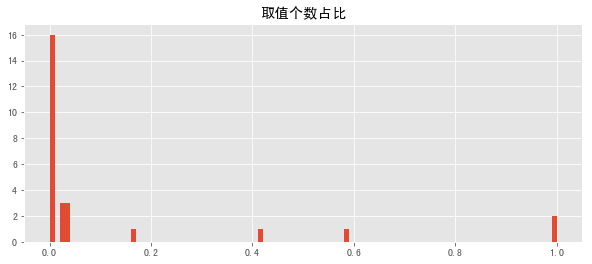

In [26]:
#画出取值个数占比
plt.figure(figsize=(10,4))
_ = plt.hist(nunique_cnt/train.shape[0],bins=100)
plt.title("取值个数占比")

##### 查看占比大于0.8的特征

In [27]:
nuniqueRate = nunique_cnt/train.shape[0]
train[nuniqueRate[nuniqueRate > 0.8].index].head()

,instance_id,context_id
0,108641074714126964,282924576738839389
1,5754713551599725161,4007979028023783431
2,842679481291040981,4884875192608989870
3,937088850059189027,840119421106178602
4,7975697065017708072,1736769971710354684


##### 查看占比在0.1~0.6

In [28]:
train[nuniqueRate[(nuniqueRate>0.1)&(nuniqueRate<0.6)].index].head()

,user_id,context_timestamp,predict_category_property
0,4505772604969228686,1537236544,5799347067982556520:-1;509660095530134768:-1;5...
1,2692638157208937547,1537243232,5799347067982556520:9172976955054793469;790838...
2,5247924392014515924,1537211052,5799347067982556520:5131280576272319091;725801...
3,2681414445369714628,1537222670,509660095530134768:-1;5799347067982556520:-1;7...
4,2729475788342039013,1537271320,5799347067982556520:9172976955054793469;790838...


#### 查看占比<0.1

In [29]:
train[nuniqueRate[(nuniqueRate<=0.1)].index].head()

,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_gender_id,...,user_star_level,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,1,...,3003,4006,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0,...,3006,4001,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0,...,3004,4001,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,1,...,3006,4016,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0,...,3001,4001,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


### 1.2 查看空值比例

In [30]:
train.isnull().sum(axis=0)

instance_id                  0
item_id                      0
item_category_list           0
item_property_list           0
item_brand_id                0
item_city_id                 0
item_price_level             0
item_sales_level             0
item_collected_level         0
item_pv_level                0
user_id                      0
user_gender_id               0
user_age_level               0
user_occupation_id           0
user_star_level              0
context_id                   0
context_timestamp            0
context_page_id              0
predict_category_property    0
shop_id                      0
shop_review_num_level        0
shop_review_positive_rate    0
shop_star_level              0
shop_score_service           0
shop_score_delivery          0
shop_score_description       0
is_trade                     0
dtype: int64

In [31]:
#统计值等于-1的各特征的取值个数
isNull_cnt = pd.DataFrame(index=train.columns)
for i in train.columns:
    isNull = train[train[i]==-1].shape[0]
    isNull_cnt.loc[i,"空值个数"] = isNull

In [32]:
isNull_cnt = isNull_cnt.astype(int).sort_values(by="空值个数",ascending=False)
isNull_cnt["空值比率"] = (isNull_cnt["空值个数"]/train.shape[0] *100).map(lambda x:str(x)+"%")
isNull_cnt

,空值个数,空值比率
user_gender_id,12901,2.698598301897449%
user_occupation_id,964,0.20164706325316956%
user_age_level,964,0.20164706325316956%
user_star_level,964,0.20164706325316956%
item_sales_level,913,0.19097901322629027%
item_brand_id,472,0.09873175711151042%
item_city_id,277,0.05794215406756013%
shop_score_description,59,0.012341469638938802%
shop_score_delivery,59,0.012341469638938802%
shop_score_service,59,0.012341469638938802%


##### 结论:
------
训练数据没有空值，但是隐藏的空值是-1，-999之类,总体上来看，各字段的空值比例还不是很高

### 1.3 统计正负样本比例

In [33]:
train["is_trade"].value_counts() #统计正负样本比例

0    469069
1      8994
Name: is_trade, dtype: int64

##### 正负样本比例为52:1

### 1.4 数据类型

In [34]:
train.dtypes

instance_id                    int64
item_id                        int64
item_category_list            object
item_property_list            object
item_brand_id                  int64
item_city_id                   int64
item_price_level               int64
item_sales_level               int64
item_collected_level           int64
item_pv_level                  int64
user_id                        int64
user_gender_id                 int64
user_age_level                 int64
user_occupation_id             int64
user_star_level                int64
context_id                     int64
context_timestamp              int64
context_page_id                int64
predict_category_property     object
shop_id                        int64
shop_review_num_level          int64
shop_review_positive_rate    float64
shop_star_level                int64
shop_score_service           float64
shop_score_delivery          float64
shop_score_description       float64
is_trade                       int64
d

## 2.EDA(数据探索分析)

### 2.1 广告商品信息
----
> * 1.哪种广告商品编号(item_id)的交易率比较高
> * 2.哪种广告子类目（item_category_list）的交易率较高
> * 3.广告属性(item_property_list)
> * 4.广告品牌（item_brand_id）
> * 5.广告品牌的城市编码item_city_id
> * 6.广告价格等级（item_price_level）
> * 7.广告销量等级（item_sales_level）
> * 8.被搜藏（item_collected_level）
> * 9.被展示(item_pv_level)

In [35]:
ads = train[["instance_id","item_id","item_category_list","item_property_list",
             "item_brand_id","item_city_id","item_price_level",
            "item_sales_level","item_collected_level","item_pv_level","is_trade"]]
ads.to_pickle("../数据/ads_0.pickle")

In [36]:
ads = pd.read_pickle("../数据/ads_0.pickle")

##### 看看那个商品的占比多

In [37]:
ads["item_id"].value_counts().head(10)

7571023501622243456    3000
2986722878397696833    2836
5410526681843914464    2578
2079092401639430105    2513
2709839111509701702    2448
5716046650492250518    2267
5467735841796001072    2257
2723541945574109807    2020
3444647220397515150    1937
4817583173619024436    1919
Name: item_id, dtype: int64

In [38]:
ads[ads["is_trade"]==1]["item_id"].value_counts().head()

5410526681843914464    111
2986722878397696833     96
2079092401639430105     93
5088920748697829728     88
3444647220397515150     88
Name: item_id, dtype: int64

##### 看看哪个子类别商品占比

In [39]:
ads["item_category_list_len"] = ads["item_category_list"].map(lambda x:len(x.split(";")))
ads["item_category_list_len"].value_counts()

2    476034
3      2029
Name: item_category_list_len, dtype: int64

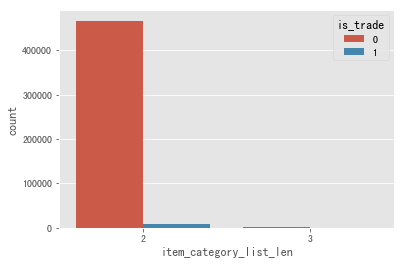

In [40]:
sns.countplot(x="item_category_list_len",data=ads,hue="is_trade")

In [41]:
len_cnt = ads.pivot_table(index="is_trade",columns="item_category_list_len",values = "instance_id",aggfunc="count")
len_cnt

item_category_list_len,2,3
is_trade,,
0,467163,1906
1,8871,123


In [42]:
chi2_contingency(len_cnt)

(190.67113102935141,
 2.2690233359850312e-43,
 1,
 array([[4.67078172e+05, 1.99082757e+03],
        [8.95582757e+03, 3.81724292e+01]]))

##### 将item_category_list拆分

In [43]:
item_category_list = ads["item_category_list"].str.split(";",expand=True)
item_category_list.columns = ["item_category_list_"+str(i) for i in range(3)]
item_category_list.head()

,item_category_list_0,item_category_list_1,item_category_list_2
0,7908382889764677758,5799347067982556520,None
1,7908382889764677758,5799347067982556520,None
2,7908382889764677758,5799347067982556520,None
3,7908382889764677758,5799347067982556520,None
4,7908382889764677758,5799347067982556520,None


In [44]:
ads = pd.concat([ads,item_category_list],axis=1)
ads.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,is_trade,item_category_list_len,item_category_list_0,item_category_list_1,item_category_list_2
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0,2,7908382889764677758,5799347067982556520,None
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0,2,7908382889764677758,5799347067982556520,None
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0,2,7908382889764677758,5799347067982556520,None
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0,2,7908382889764677758,5799347067982556520,None
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0,2,7908382889764677758,5799347067982556520,None


In [64]:
ads["item_category_list_0"].unique().shape[0]

1

In [65]:
ads["item_category_list_1"].unique().shape[0]

13

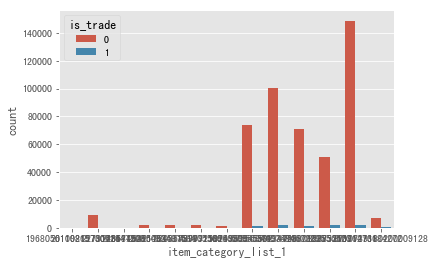

In [66]:
sns.countplot(x="item_category_list_1",data=ads,hue="is_trade")

In [69]:
ads.pivot_table(index="item_category_list_1",columns="is_trade",values = "instance_id",aggfunc="count")

is_trade,0,1
item_category_list_1,,
1968056100269760729,179,7
2011981573061447208,9411,150
22731265849056483,87,1
2436715285093487584,1916,50
2642175453151805566,1906,123
3203673979138763595,2165,79
4879721024980945592,1176,30
509660095530134768,74148,1264
5755694407684602296,100757,1726


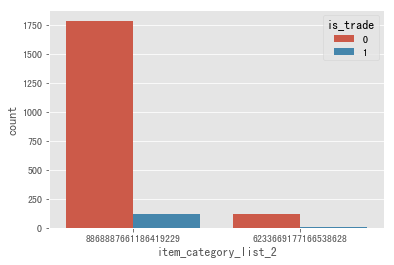

In [70]:
sns.countplot(x="item_category_list_2",data=ads,hue="is_trade")

In [71]:
ads.pivot_table(index="item_category_list_2",columns="is_trade",values = "instance_id",aggfunc="count")

is_trade,0,1
item_category_list_2,,
6233669177166538628,118,5
8868887661186419229,1788,118


##### 将item_property_list 拆分

In [45]:
#统计每条记录对应的商品属性个数
ads["item_property_list_len"] = ads["item_property_list"].map(lambda x:len(x.split(";"))) 

In [46]:
ads["item_property_list_len"] 

0         22
1         22
2         22
3         22
4         22
5         22
6         50
7         50
8         46
9         50
10        50
11        46
12        50
13        50
14        50
15        50
16        46
17        46
18        50
19        50
20        50
21        50
22        46
23        46
24        46
25        46
26        50
27        46
28        50
29        30
          ..
478108    44
478109    44
478110    44
478111    44
478112    24
478113    21
478114    26
478115    26
478116    37
478117    37
478118    37
478119    35
478120    35
478121    35
478122    23
478123    25
478124    23
478125    25
478126    19
478127    23
478128    23
478129    19
478130    25
478131    48
478132    48
478133    48
478134    48
478135    48
478136    48
478137    26
Name: item_property_list_len, Length: 478063, dtype: int64

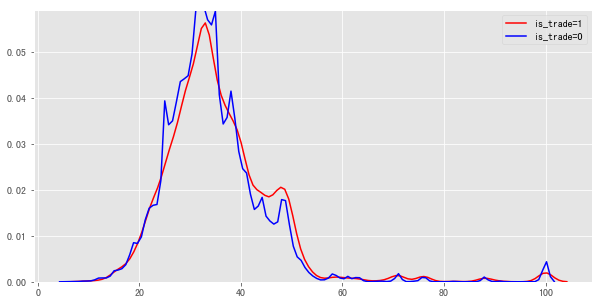

In [47]:
#查看一条广告的属性个数与交易率的关系
fig,ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ads[ads["is_trade"]==1]["item_property_list_len"],label = "is_trade=1",color = "r",ax=ax)
sns.kdeplot(ads[ads["is_trade"]==0]["item_property_list_len"],label = "is_trade=0",color = "b",ax=ax)

##### 结论
----
每条记录对应的商品属性个数与是否交易没有明显的关系

##### 统计商品属性与是否交易的关系

In [72]:
ads["item_property_list"].value_counts()

(10907,)

In [56]:
item_property_list = ads["item_property_list"].map(lambda x:"|".join(x.split(";")))

In [58]:
item_property_list = "|".join(item_property_list.tolist())

In [59]:
item_property_list = item_property_list.split("|")
item_property_list = list(set(item_property_list))

In [60]:
len(item_property_list)

61406

#### 结论：广告属性有6万个，暂且先不分析

##### 广告品牌

In [79]:
ads.pivot_table(index="item_brand_id",columns="is_trade",values = "instance_id",aggfunc="count")

is_trade,0,1
item_brand_id,,
-1,463.0,9.0
1519408548701639,2.0,NaN
2258579918686057,84.0,NaN
3319198235217144,347.0,9.0
3718718487310364,45.0,NaN
4083991695698405,256.0,20.0
9283961194704687,47.0,NaN
10179799365659567,9.0,NaN
12889248311141240,2.0,NaN


In [80]:
ads["item_brand_id"].unique().shape

(2055,)

In [81]:
ads["item_brand_id"].value_counts()

7838285046767229711    69728
7066302540842412840    13823
5051039799137810159    13042
448955875785543916     10114
739382823914881928      6539
6793286343174833903     5280
1902568530584691432     4605
4609398715869550725     4235
6597576831450166037     4216
8188723660812005813     3738
5818352635473521241     3730
3801992748557162347     3474
7024713306861377790     3452
7166307405309656478     3195
3765442984647241130     3178
1212158767298395095     3096
1842327023449366624     3033
5368019250815240955     2989
6553461951829665552     2763
3884267719846612071     2678
3697251094784296011     2641
7393038778026345793     2606
4940851772115583463     2491
2441922225904422164     2455
3321064285232298680     2388
665010924190078800      2375
8036402958319042519     2369
6874110308416919683     2347
4219436286513843074     2339
2707400123518269628     2288
                       ...  
3095754226004529341        1
5454033227514511696        1
4688766976726863845        1
23545905335358

##### 城市编码

In [82]:
ads["item_city_id"].unique()

array([3948283326616421003,  548352491538518780, 3776439227963994256,
       1019055478500227370, 7534238860363577544, 7322157373578955368,
       8762827044490678569, 6154585379646116922, 5918626470536001929,
       8034210119001863030,  196257267849351217, 4556484397418645693,
       8939023195347666945, 4644954126004286009, 3122721854741763495,
       6652984710464900997, 6738283504825746594,  739849083029856578,
       8201343797229916526, 2171543029187596030, 2174699138227015967,
       6027631083130214337, 8480550192700287318, 8072963182326625214,
       6620239887342530822,  481482873950391103, 4918413420989329604,
       4374800994578205793, 3819392654129628501, 5161571070109172606,
       9070707733479115872, 5978421288935197064, 7219323489207530724,
       2022231041883668124, 2606104910636876898, 4083296682961047771,
       8519578687848277273,  333440506879701736, 4228028106931716766,
       8240548652619864253, 1659868702501373320, 5326000431362991708,
       6015153214652

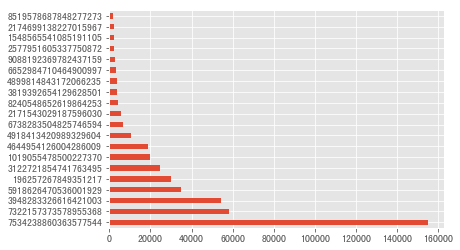

In [86]:
ads["item_city_id"].value_counts().head(20).plot("barh")

##### 价格

In [88]:
ads["item_price_level"].value_counts()

7     209263
8     115573
6      89037
5      41051
4      14594
9       4035
3       3587
10       456
2        347
1         85
11        21
0         12
17         1
16         1
Name: item_price_level, dtype: int64

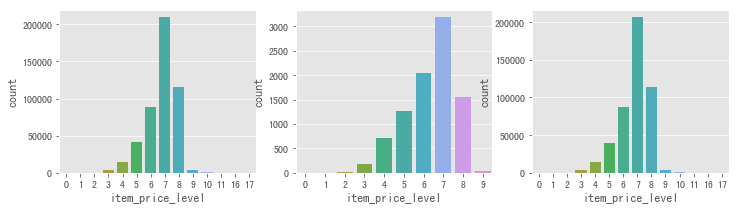

In [106]:
fig,(ax0,ax1,ax2) = plt.subplots(figsize=(12,3),nrows=1,ncols=3)
sns.countplot(x="item_price_level",data=ads,ax=ax0)
sns.countplot(x="item_price_level",data=ads[ads["is_trade"]==1],ax=ax1)
sns.countplot(x="item_price_level",data=ads[ads["is_trade"]==0],ax=ax2)

##### item_sales_level

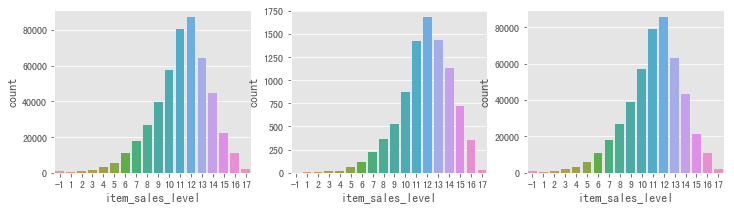

In [105]:
fig,(ax0,ax1,ax2) = plt.subplots(figsize=(12,3),nrows=1,ncols=3)
sns.countplot(x="item_sales_level",data=ads,ax=ax0)
sns.countplot(x="item_sales_level",data=ads[ads["is_trade"]==1],ax=ax1)
sns.countplot(x="item_sales_level",data=ads[ads["is_trade"]==0],ax=ax2)

#### 被展示

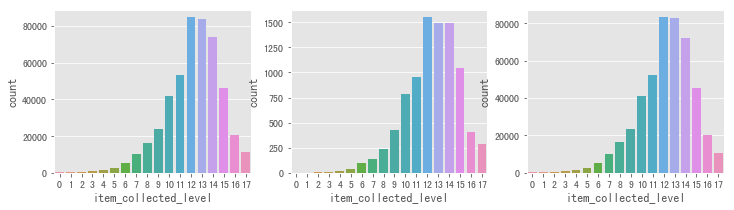

In [104]:
fig,(ax0,ax1,ax2) = plt.subplots(figsize=(12,3),nrows=1,ncols=3)
sns.countplot(x="item_collected_level",data=ads,ax=ax0)
sns.countplot(x="item_collected_level",data=ads[ads["is_trade"]==1],ax=ax1)
sns.countplot(x="item_collected_level",data=ads[ads["is_trade"]==0],ax=ax2)

#### 被展示

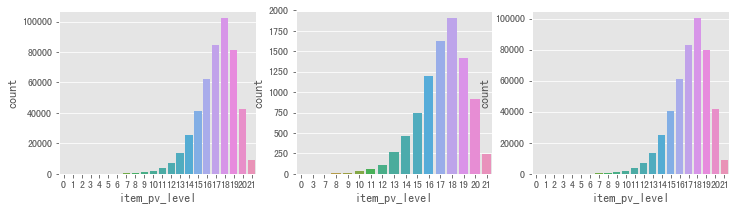

In [103]:
fig,(ax0,ax1,ax2) = plt.subplots(figsize=(12,3),nrows=1,ncols=3)
sns.countplot(x="item_pv_level",data=ads,ax=ax0)
sns.countplot(x="item_pv_level",data=ads[ads["is_trade"]==1],ax=ax1)
sns.countplot(x="item_pv_level",data=ads[ads["is_trade"]==0],ax=ax2)

# 用户基本信息

In [153]:
user = train[["instance_id","user_id","user_gender_id","user_age_level","user_occupation_id","user_star_level","is_trade"]]
user.head()

,instance_id,user_id,user_gender_id,user_age_level,user_occupation_id,user_star_level,is_trade
0,108641074714126964,4505772604969228686,1,1003,2005,3003,0
1,5754713551599725161,2692638157208937547,0,1002,2005,3006,0
2,842679481291040981,5247924392014515924,0,1003,2005,3004,0
3,937088850059189027,2681414445369714628,1,1004,2005,3006,0
4,7975697065017708072,2729475788342039013,0,1002,2005,3001,0


In [154]:
user.to_pickle("../数据/user_0.pickle")

In [159]:
user_ins_cnt = user.pivot_table(values="instance_id",index="user_id",aggfunc="count")
user_ins_cnt.columns =["user_ins_cnt"]
user = pd.merge(user,user_ins_cnt.reset_index(),left_on="user_id",right_on="user_id",how="left").drop_duplicates()

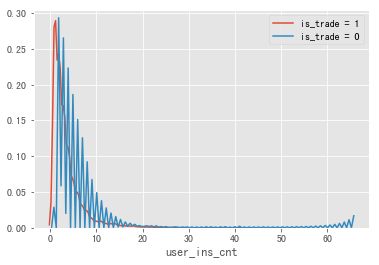

In [160]:
sns.distplot(user[user["is_trade"]==1]["user_ins_cnt"],label="is_trade = 1",hist=False)
sns.distplot(user[user["is_trade"]==0]["user_ins_cnt"],label="is_trade = 0",hist=False)

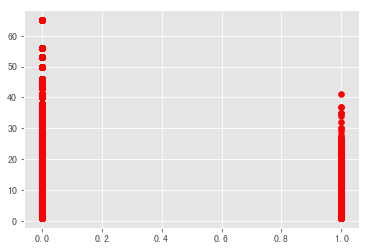

In [161]:
plt.scatter(x=user['is_trade'], y=user["user_ins_cnt"], c='r')

In [141]:
def countPlot(df,cols):
    fig,(ax0,ax1,ax2) = plt.subplots(figsize=(12,3),nrows=1,ncols=3)
    sns.countplot(x=cols,data=df,ax=ax0)
    sns.countplot(x=cols,data=df[df["is_trade"]==1],ax=ax1)
    sns.countplot(x=cols,data=df[df["is_trade"]==0],ax=ax2)

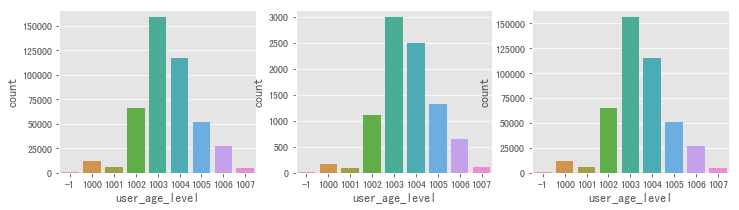

In [142]:
countPlot(user,"user_age_level")

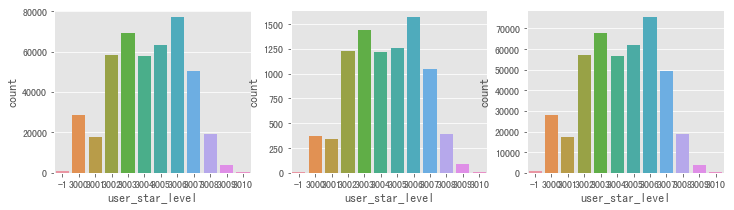

In [143]:
countPlot(user,"user_star_level")

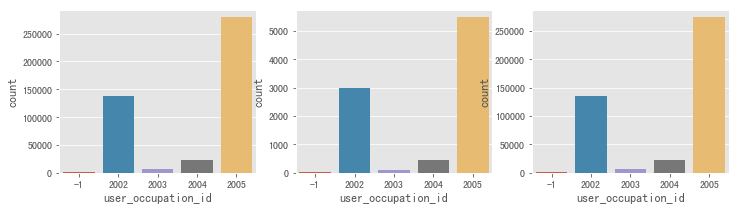

In [144]:
countPlot(user,"user_occupation_id")

# 店铺

In [151]:
shops = train[["instance_id","shop_review_num_level","shop_review_positive_rate","shop_star_level","shop_score_service","shop_score_delivery","shop_score_description",
      "is_trade"]]


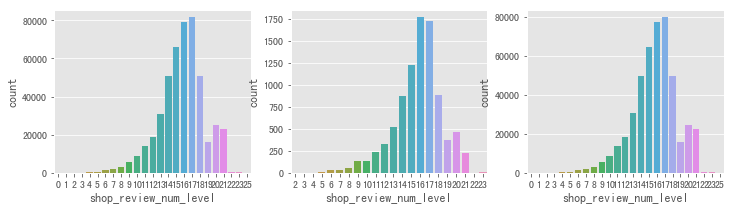

In [162]:
countPlot(shops,"shop_review_num_level")

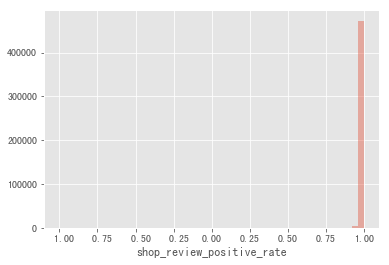

In [166]:
sns.distplot(shops["shop_review_positive_rate"],kde=False)

In [168]:
a = shops[["shop_review_positive_rate","is_trade"]].drop_duplicates()
sns.distplot(a[a["is_trade"]==1]["shop_revi"])
sns.distplot(a[a["is_trade"]==0])

,shop_review_positive_rate,is_trade
0,1.000000,0
6,0.985427,0
14,0.985427,1
29,0.980592,0
36,0.967752,0
40,0.997040,0
52,0.997040,1
1892,0.994259,0
1894,0.976328,0
1915,0.985776,0
